# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #Simple Exp Smoothing
from statsmodels.tsa.holtwinters import Holt #Holt Exp Smoothing / DES
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Exp smoothing / TES

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [31]:
data = pd.read_excel('Reliance Daily Dataset (1).xlsx')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432,9740,-0.0036
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835,19270,-0.0026
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788,39864,-0.0110
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603546,8596809.0,975422,26226,-0.0454
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0,660342,24450,0.0218
5,2015-01-08,426.011841,427.398682,416.130493,417.071564,396.404510,9171029.0,787134,20043,-0.0143
6,2015-01-09,420.216766,426.952911,418.532715,426.110901,404.995911,6180769.0,510671,16807,0.0217
7,2015-01-12,426.209961,426.457611,416.848694,421.157837,400.288269,4661200.0,503008,12635,-0.0116
8,2015-01-13,422.495178,423.460999,416.303864,417.616425,396.922363,4591328.0,426946,17722,-0.0084
9,2015-01-14,417.542114,419.523346,411.697510,413.554901,393.062103,5251887.0,669183,22637,-0.0097


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1994 non-null   datetime64[ns]
 1   Open           1993 non-null   float64       
 2   High           1993 non-null   float64       
 3   Low            1993 non-null   float64       
 4   Close          1993 non-null   float64       
 5   Adj Close      1993 non-null   float64       
 6   Volume         1993 non-null   float64       
 7   No. of Shares  1994 non-null   int64         
 8   No. of Trades  1994 non-null   int64         
 9   Change(%)      1994 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 155.9 KB


In [33]:
data.dropna(axis=0, inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1993 non-null   datetime64[ns]
 1   Open           1993 non-null   float64       
 2   High           1993 non-null   float64       
 3   Low            1993 non-null   float64       
 4   Close          1993 non-null   float64       
 5   Adj Close      1993 non-null   float64       
 6   Volume         1993 non-null   float64       
 7   No. of Shares  1993 non-null   int64         
 8   No. of Trades  1993 non-null   int64         
 9   Change(%)      1993 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 171.3 KB


In [37]:
data.to_csv('stock_data.csv')

In [38]:
data=pd.read_csv('stock_data.csv')

In [93]:
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
1984,2023-01-17,2458.000000,2483.000000,2450.600098,2478.800049,2478.800049,4961585.0,186970,13442,0.0142
1985,2023-01-18,2473.500000,2491.100098,2460.350098,2474.699951,2474.699951,6206382.0,126814,7526,-0.0017
1986,2023-01-19,2472.899902,2481.149902,2456.649902,2472.050049,2472.050049,5510333.0,201558,11803,-0.0011
1987,2023-01-20,2475.000000,2475.000000,2437.250000,2442.649902,2442.649902,6890325.0,174012,11317,-0.0119
1988,2023-01-23,2449.000000,2466.199951,2425.000000,2430.300049,2430.300049,5055324.0,213860,19969,-0.0051
1989,2023-01-24,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558.0,349349,15122,-0.0059
1990,2023-01-25,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684.0,103914,14987,-0.0138
1991,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582,59632,-0.0190
1992,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194,29192,0.0096
1993,2023-01-31,2382.000000,2387.650000,2341.000000,2353.850000,2353.850000,10470859.0,100296,10412,-0.0025


In [35]:
data[data['Date']=='2016-02-29']

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
287,2016-02-29,471.183655,492.630371,463.110168,478.786591,460.348175,14321426.0,999988,22873,0.0172


In [173]:
# rows=data[(data['Date']=='2016-02-29') | (data['Date']=='2020-02-29')].index
# rows

Int64Index([287], dtype='int64')

In [175]:
# data.drop(rows, axis=0, inplace=True)

In [28]:
data.isna().sum()

Date             0
Open             1
High             1
Low              1
Close            1
Adj Close        1
Volume           1
No. of Shares    0
No. of Trades    0
Change(%)        0
dtype: int64

In [34]:
data.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
No. of Shares    0
No. of Trades    0
Change(%)        0
dtype: int64

In [7]:
data.shape

(1993, 11)

# Model Building

In [8]:
Train = data.head(1963)
Test = data.tail(30)
# train=Train
# test=Test

## Moving Average

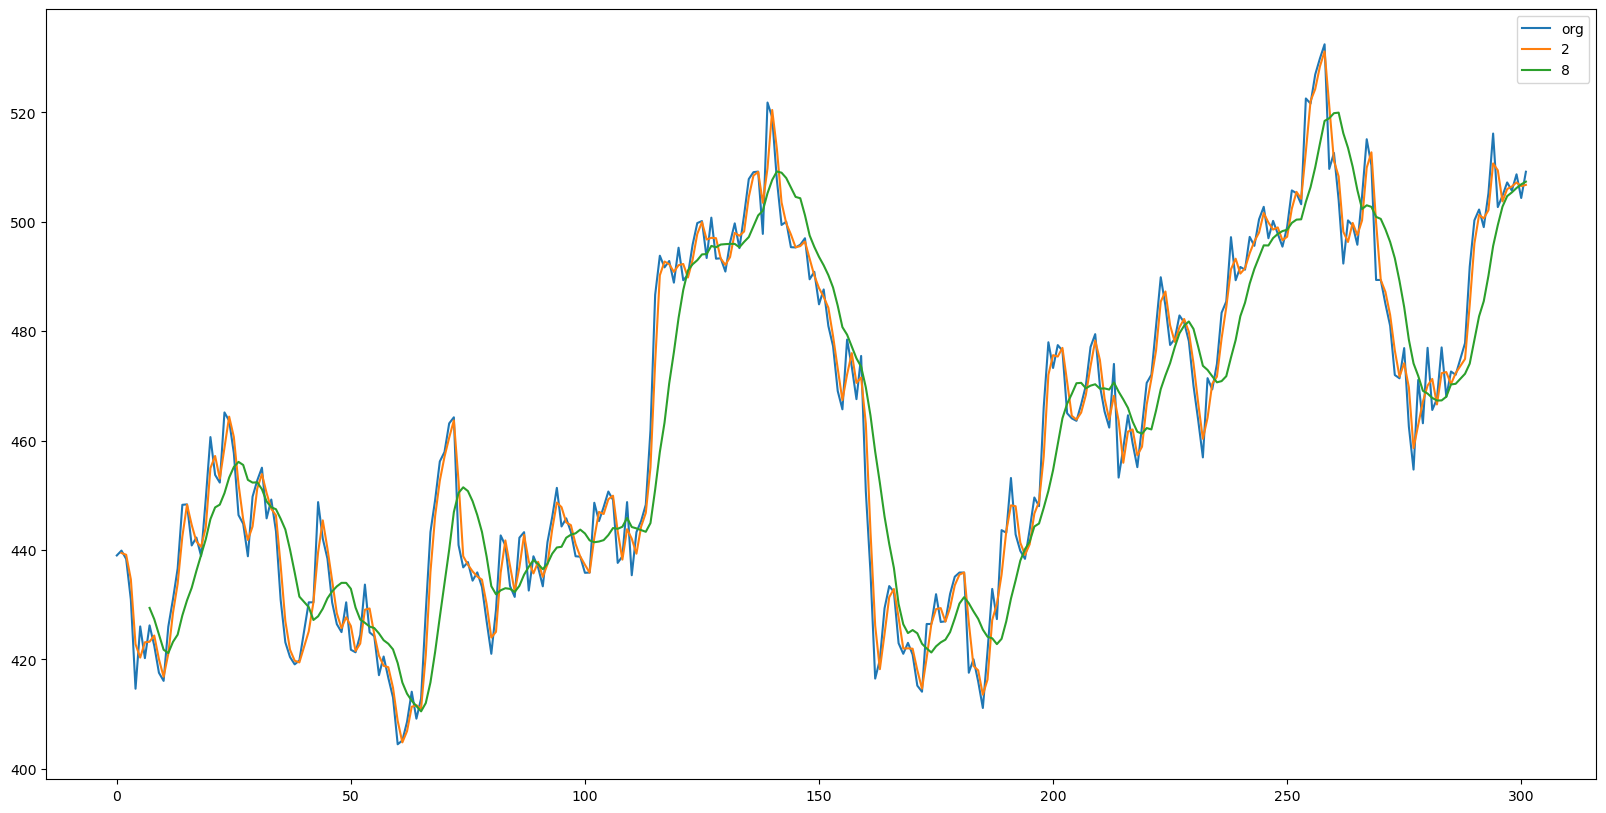

In [178]:
plt.figure(figsize=(20,10))
data["Open"].head(300).plot(label="org")
for i in range(2,12,6):
    data["Open"].head(300).rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

## Time series decomposition plot

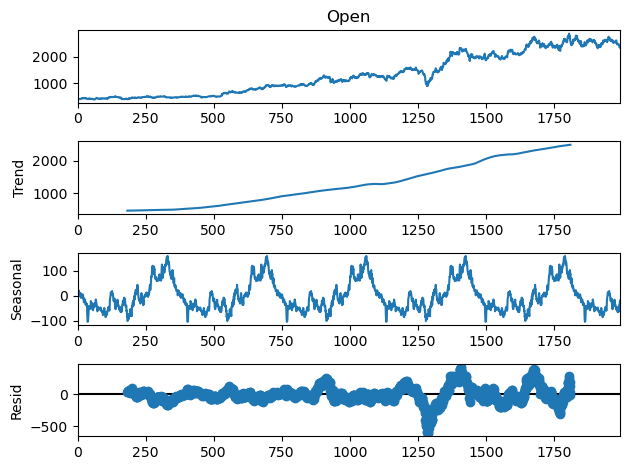

In [179]:
decompose_ts_add = seasonal_decompose(data["Open"],period=365,model='additive')
decompose_ts_add.plot()
plt.show()

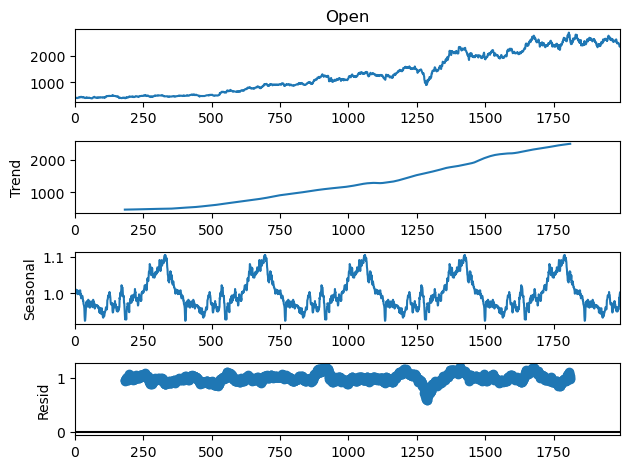

In [180]:
decompose_ts_add = seasonal_decompose(data["Open"],period=365,model='multiplicative')
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

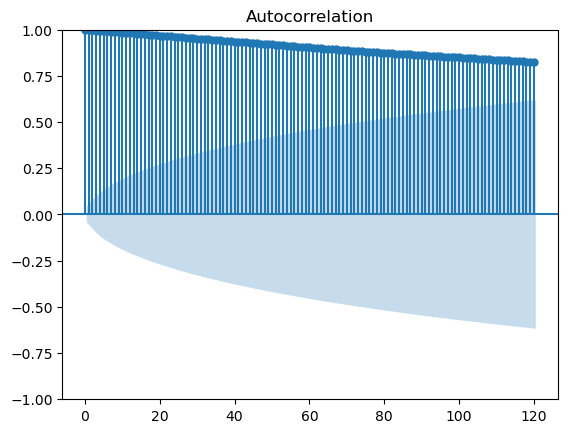

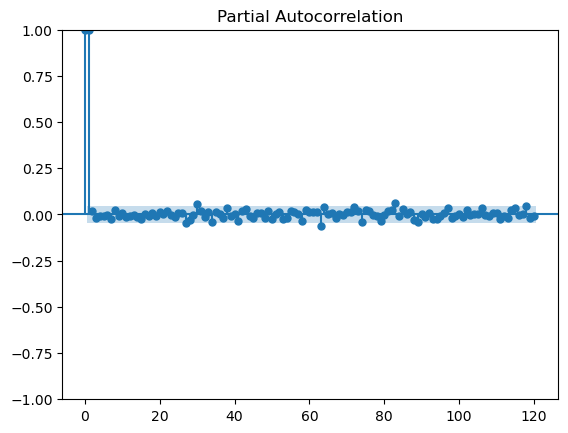

In [181]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data['Open'],lags=120)
tsa_plots.plot_pacf(data['Open'],lags=120)
plt.show()

## Evaluation Metric MAPE

In [9]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [10]:
ses_model_open = SimpleExpSmoothing(Train["Open"]).fit(smoothing_level=0.2)
pred_ses_open = ses_model_open.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses_open,Test.Open) 

4.3898068845222005

In [11]:
ses_model_close = SimpleExpSmoothing(Train["Close"]).fit(smoothing_level=0.2)
pred_ses_close = ses_model_close.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses_close,Test.Close) 

4.686546738904807

In [12]:
ses_model_high = SimpleExpSmoothing(Train["High"]).fit(smoothing_level=0.2)
pred_ses_high = ses_model_high.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses_high,Test.High) 

4.598511136235628

In [13]:
ses_model_low = SimpleExpSmoothing(Train["Low"]).fit(smoothing_level=0.2)
pred_ses_low = ses_model_low.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses_low,Test.Low) 

4.787191945862748

## Holt method

In [15]:
hw_model_open = Holt(Train["Open"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw_open = hw_model_open.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw_open,Test.Open)

3.223701472434622

In [16]:
hw_model_close = Holt(Train["Close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw_close = hw_model_close.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw_close,Test.Close)

1.306218909946801

In [17]:
hw_model_high = Holt(Train["High"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw_high = hw_model_high.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw_high,Test.High)

1.9569034938988457

In [18]:
hw_model_low = Holt(Train["Low"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw_low = hw_model_low.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw_low,Test.Low)

1.9782247708837475

## Holts winter exponential smoothing with additive seasonality and additive trend

In [149]:
hwe_model_add_add_open = ExponentialSmoothing(train["Open"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add_open = hwe_model_add_add_open.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add_open,test.Open)

2.6817646007124356

In [150]:
hwe_model_add_add_close = ExponentialSmoothing(train["Close"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add_close = hwe_model_add_add_close.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add_close,test.Close)

4.518709886112067

In [151]:
hwe_model_add_add_high = ExponentialSmoothing(train["High"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add_high = hwe_model_add_add_high.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add_high,test.High)

3.0969516205645817

In [152]:
hwe_model_add_add_low = ExponentialSmoothing(train["Low"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add_low = hwe_model_add_add_low.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add_low,test.Low)

4.026312175424057

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [19]:
hwe_model_Open = ExponentialSmoothing(Train["Open"],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_Open = hwe_model_Open.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_Open,Test["Open"])

1.9287007569724137

In [20]:
hwe_model_Close = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_Close = hwe_model_Close.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_Close,Test["Close"])

3.478095166737679

In [21]:
hwe_model_High = ExponentialSmoothing(Train["High"],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_High = hwe_model_High.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_High,Test["High"])

2.335380848757843

In [22]:
hwe_model_Low = ExponentialSmoothing(Train["Low"],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_Low = hwe_model_Low.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_Low,Test["Low"])

2.7624375465191

## Forecast for the month of Feb

In [61]:
def forecast(days):
    df=pd.DataFrame()
    df['Open']=hwe_model_Open.forecast(days).round(2)
    df['Close']=hwe_model_Close.forecast(days).round(2)
    df['High']=hwe_model_High.forecast(days).round(2)
    df['Low']=hwe_model_Low.forecast(days).round(2)
    test_date = datetime.datetime.strptime("01-02-2023", "%d-%m-%Y")
    date_generated = pd.date_range(test_date, periods=days)
    df.index=date_generated.strftime("%d-%m-%Y")
    return df

In [214]:
forecast(28)

,Open,Close,High,Low
01-02-2023,2560.43,2545.56,2578.55,2544.97
02-02-2023,2555.50,2563.37,2587.53,2547.09
03-02-2023,2578.00,2590.80,2612.69,2560.83
04-02-2023,2587.59,2579.99,2613.04,2566.00
05-02-2023,2583.48,2551.52,2605.37,2550.04
06-02-2023,2560.61,2558.70,2601.18,2552.23
07-02-2023,2580.14,2580.41,2609.84,2563.52
08-02-2023,2595.33,2585.35,2615.31,2571.49
09-02-2023,2599.42,2584.88,2616.86,2574.89
10-02-2023,2593.69,2587.17,2630.00,2579.85


In [43]:
# days=10
# df=pd.DataFrame()
# df['Open']=hwe_model_Open.forecast(days).round(2)
# df['Close']=hwe_model_Close.forecast(days).round(2)
# df['High']=hwe_model_High.forecast(days).round(2)
# df['Low']=hwe_model_Low.forecast(days).round(2)
# test_date = datetime.datetime.strptime("01-02-2023", "%d-%m-%Y")
# date_generated = pd.date_range(test_date, periods=days)
# df.index=date_generated.strftime("%d-%m-%Y")

In [54]:
# result=df.to_html()
# print(result)

In [55]:
# html = df.to_html()
  
# # write html to file
# text_file = open("index.html", "w")
# text_file.write(html)
# text_file.close()

In [159]:
# from IPython.display import HTML
# HTML(df.to_html(classes='table table-stripped'))

In [75]:
def forecast_html(days):
    df=pd.DataFrame()
    df['Open']=hwe_model_Open.forecast(days).round(2)
    df['Close']=hwe_model_Close.forecast(days).round(2)
    df['High']=hwe_model_High.forecast(days).round(2)
    df['Low']=hwe_model_Low.forecast(days).round(2)
    test_date = datetime.datetime.strptime("01-02-2023", "%d-%m-%Y")
    date_generated = pd.date_range(test_date, periods=days)
    df.index=date_generated.strftime("%d-%m-%Y")
    
#     html = 
    df.to_html("C:\\Users\\hp\\Flask\\stock_venv\\templates\\forecast1.html")
#     text_file = open("forecast.html", "w")
#     text_file.write(html)
#     text_file.close()
    

In [76]:
forecast_html(10)

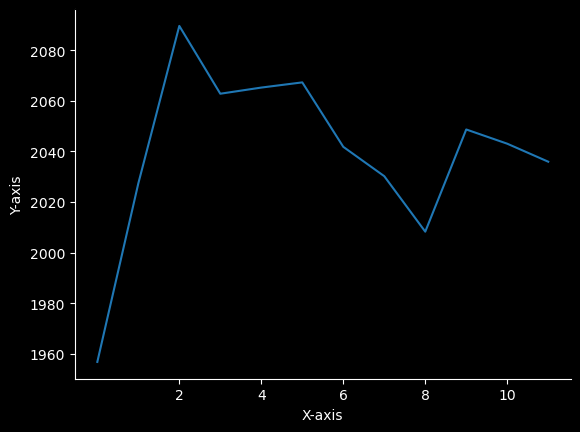

In [125]:
plt.figure(facecolor='black')
 
ax = plt.axes()
ax.set_facecolor("black")

plt.plot(df["Open"])
# plt.plot(df["Low"])

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='White')
ax.tick_params(axis='y', colors='White')

ax.spines['left'].set_color('White')  
ax.spines['bottom'].set_color('White')
plt.xticks(ticks=[2,4,6,8,10], labels=[2,4,6,8,10])

plt.show()

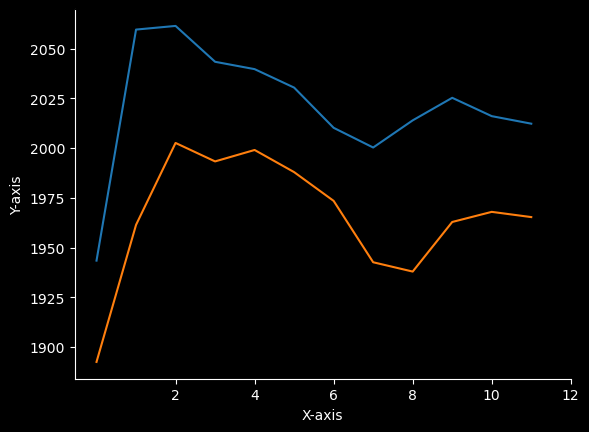

In [126]:
plt.figure(facecolor='black')
 
ax = plt.axes()
ax.set_facecolor("black")

plt.plot(df["High"])
plt.plot(df["Low"])

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='White')
ax.tick_params(axis='y', colors='White')

ax.spines['left'].set_color('White')  
ax.spines['bottom'].set_color('White')
plt.xticks(ticks=[2,4,6,8,10,12], labels=[2,4,6,8,10,12])

plt.show()

# Interpolation for improved accuracy

In [90]:
dates = pd.date_range(start="2015-01-01",end="2023-01-31").tolist()
type(dates)

list

In [91]:
dates_df=pd.DataFrame()
dates_df['Date']=dates

In [92]:
dates_df

,Date
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
2948,2023-01-27
2949,2023-01-28
2950,2023-01-29
2951,2023-01-30


In [198]:
data=pd.read_csv('stock_data.csv', parse_dates=True, squeeze=True)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1993 non-null   int64  
 1   Date           1993 non-null   object 
 2   Open           1993 non-null   float64
 3   High           1993 non-null   float64
 4   Low            1993 non-null   float64
 5   Close          1993 non-null   float64
 6   Adj Close      1993 non-null   float64
 7   Volume         1993 non-null   float64
 8   No. of Shares  1993 non-null   int64  
 9   No. of Trades  1993 non-null   int64  
 10  Change(%)      1993 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 171.4+ KB


In [201]:
data['Date'] = pd.to_datetime(data['Date'])
# data['Date']=pd.DatetimeIndex(data['Date'])

In [195]:
# pd.DatetimeIndex(data['Date'])

In [202]:
data_interpolate = dates_df.merge(data, on='Date', how='left')

In [203]:
data_interpolate

,Date,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,0.0,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432.0,9740.0,-0.0036
1,2015-01-02,1.0,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835.0,19270.0,-0.0026
2,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2.0,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788.0,39864.0,-0.0110
...,...,...,...,...,...,...,...,...,...,...,...
2948,2023-01-27,1991.0,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582.0,59632.0,-0.0190
2949,2023-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2950,2023-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2951,2023-01-30,1992.0,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194.0,29192.0,0.0096


In [204]:
data_interpolate.drop(['Unnamed: 0'], axis=1, inplace=True)
data_interpolate

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432.0,9740.0,-0.0036
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835.0,19270.0,-0.0026
2,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788.0,39864.0,-0.0110
...,...,...,...,...,...,...,...,...,...,...
2948,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582.0,59632.0,-0.0190
2949,2023-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2950,2023-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2951,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194.0,29192.0,0.0096


In [205]:
data_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2953 entries, 0 to 2952
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2953 non-null   datetime64[ns]
 1   Open           1993 non-null   float64       
 2   High           1993 non-null   float64       
 3   Low            1993 non-null   float64       
 4   Close          1993 non-null   float64       
 5   Adj Close      1993 non-null   float64       
 6   Volume         1993 non-null   float64       
 7   No. of Shares  1993 non-null   float64       
 8   No. of Trades  1993 non-null   float64       
 9   Change(%)      1993 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 253.8 KB


In [206]:
interpolated_open = data_interpolate['Open'].interpolate(method='linear',limit=2)
interpolated_close = data_interpolate['Close'].interpolate(method='linear',limit=2)
interpolated_high = data_interpolate['High'].interpolate(method='linear',limit=2)
interpolated_low = data_interpolate['Low'].interpolate(method='linear',limit=2)

In [209]:
df_int=pd.DataFrame()
df_int['Date']=data_interpolate['Date']
df_int['Open']=interpolated_open
df_int['Close']=interpolated_close
df_int['High']=interpolated_high
df_int['Low']=interpolated_low
# df_int['Adj Close']
# df_int['Volume']
# df_int['No. of Shares']
# df_int['No. of Trades']
# df_int['Change(%)]
df_int.set_index('Date',inplace=True)
df_int

,Open,Close,High,Low
Date,,,,
2015-01-01,438.988831,439.781311,441.812073,437.676270
2015-01-02,439.880371,438.617340,443.818054,437.998199
2015-01-03,439.368561,437.015859,442.967773,436.314168
2015-01-04,438.856750,435.414378,442.117493,434.630137
2015-01-05,438.344940,433.812897,441.267212,432.946106
...,...,...,...,...
2023-01-27,2384.399902,2337.350098,2387.350098,2311.649902
2023-01-28,2366.833252,2344.816732,2382.200033,2308.099935
2023-01-29,2349.266601,2352.283366,2377.049967,2304.549967


In [191]:
df_int[df_int["Low"]<0]

,Date,Open,Close,High,Low


In [127]:
ffill_imputation = data_interpolate.fillna(method='ffill')

In [128]:
ffill_imputation

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432.0,9740.0,-0.0036
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835.0,19270.0,-0.0026
2,2015-01-03,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835.0,19270.0,-0.0026
3,2015-01-04,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835.0,19270.0,-0.0026
4,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788.0,39864.0,-0.0110
...,...,...,...,...,...,...,...,...,...,...
2948,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582.0,59632.0,-0.0190
2949,2023-01-28,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582.0,59632.0,-0.0190
2950,2023-01-29,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582.0,59632.0,-0.0190
2951,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194.0,29192.0,0.0096


In [140]:
bfill_imputation = data_interpolate.fillna(method='bfill')
bfill_imputation

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432.0,9740.0,-0.0036
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835.0,19270.0,-0.0026
2,2015-01-03,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788.0,39864.0,-0.0110
3,2015-01-04,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788.0,39864.0,-0.0110
4,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788.0,39864.0,-0.0110
...,...,...,...,...,...,...,...,...,...,...
2948,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582.0,59632.0,-0.0190
2949,2023-01-28,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194.0,29192.0,0.0096
2950,2023-01-29,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194.0,29192.0,0.0096
2951,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194.0,29192.0,0.0096


Text(0.5, 1.0, 'bfill')

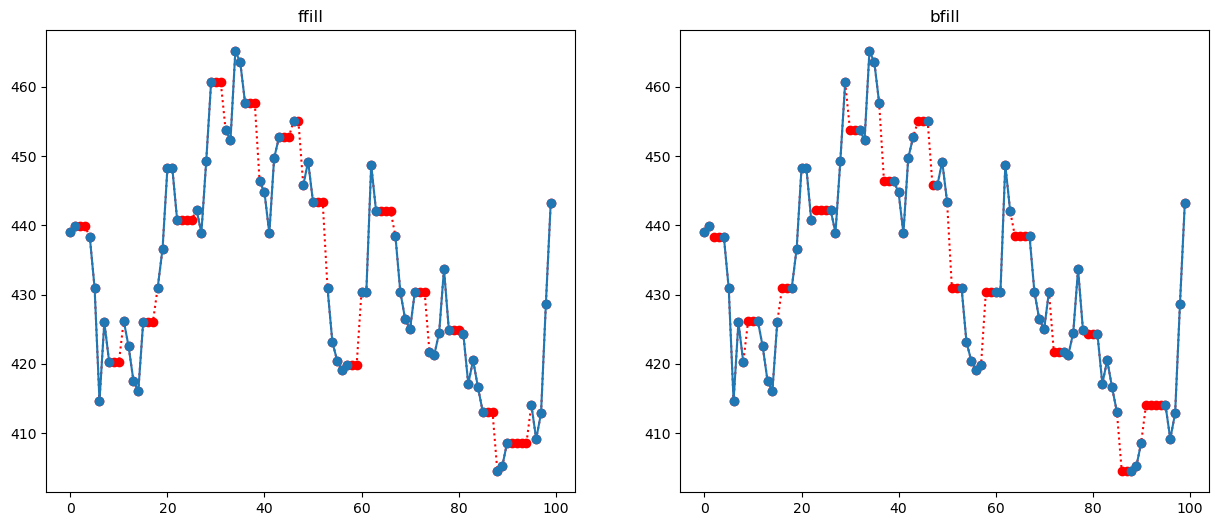

In [158]:
fig,a =  plt.subplots(1,2,figsize=(15,6))
a[0].plot(ffill_imputation['Open'][:100],color='red', marker='o', linestyle='dotted')
a[0].plot(data_interpolate['Open'][:100], marker='o')
a[0].set_title("ffill")
a[1].plot(bfill_imputation['Open'][:100],color='red', marker='o', linestyle='dotted')
a[1].plot(data_interpolate['Open'][:100], marker='o')
a[1].set_title("bfill")

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [161]:
# Train = ffill_imputation.head(2923)
# Test = ffill_imputation.tail(30)

In [210]:
Train = df_int.head(2923)
Test = df_int.tail(30)

In [212]:
hwe_model_Open = ExponentialSmoothing(Train["Open"],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_Open = hwe_model_Open.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_Open,Test["Open"])

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

In [163]:
hwe_model_Close = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_Close = hwe_model_Close.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_Close,Test["Close"])

6.178232717655087

In [164]:
hwe_model_High = ExponentialSmoothing(Train["High"],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_High = hwe_model_High.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_High,Test["High"])

6.845413845448091

In [165]:
hwe_model_Low = ExponentialSmoothing(Train["Low"],seasonal="mul",trend="add",seasonal_periods=365).fit()
pred_hwe_Low = hwe_model_Low.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_Low,Test["Low"])

6.498274002241468